In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 

In [38]:
ICU=pd.read_csv("Preprocessed ICU data.csv")
ICU.isna().any()
ICU
#ICU.Gender.unique()
#test = ICU.Gender == 0.56192144
#test.any()
ICU = ICU.drop(labels=[475,1312], axis = 0, inplace=False)
ICU

,RecordID,Age,Gender,Height,ICUType2,ICUType3,ICUType4,Mean_Weight.x,Mean_GCS.x,Mean_HR.x,...,Max_ALT.y,Max_AST.y,Max_Bilirubin.y,Max_Lactate.y,Max_Cholesterol.y,Max_TroponinI.y,Max_TroponinT.y,SAPS.I,SOFA,In.hospital_death
0,132543,68,1.0,180.300000,0,1,0,84.600000,14.888889,72.971429,...,12.000000,15.000000,0.200000,2.395461,156.842105,7.132683,1.114629,7,1,0
1,132545,88,0.0,169.787227,0,1,0,83.054136,15.000000,79.520000,...,189.169186,260.323666,1.979557,2.395461,156.842105,7.132683,1.114629,17,2,0
2,132547,64,1.0,180.300000,0,0,0,114.000000,8.333333,81.318182,...,60.000000,162.000000,0.400000,2.395461,212.000000,1.300000,1.114629,14,11,0
3,132551,78,0.0,162.600000,0,1,0,48.400000,13.250000,78.125000,...,46.000000,82.000000,0.300000,2.300000,156.842105,3.500000,1.114629,19,8,1
4,132554,64,0.0,169.787227,0,1,0,60.700000,15.000000,129.363636,...,189.169186,260.323666,1.979557,2.395461,156.842105,7.132683,1.114629,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,142661,89,1.0,177.800000,0,0,1,64.000000,11.214286,86.260870,...,189.169186,260.323666,1.979557,2.395461,156.842105,7.132683,1.114629,6,4,0
1470,142662,86,1.0,162.600000,0,1,0,53.000000,13.000000,85.517241,...,28.000000,35.000000,0.900000,2.395461,156.842105,7.132683,1.114629,19,8,0
1471,142664,51,0.0,169.787227,0,0,1,75.000000,9.909091,91.147059,...,189.169186,260.323666,1.979557,2.395461,156.842105,7.132683,1.114629,13,8,0
1472,142665,70,0.0,169.787227,0,0,1,87.000000,10.833333,101.083333,...,189.169186,260.323666,1.979557,1.100000,156.842105,7.132683,1.114629,19,7,0


In [39]:
for i in range(1,len(ICU.columns)):
    print(ICU.columns[[i]])

Index(['Age'], dtype='object')
Index(['Gender'], dtype='object')
Index(['Height'], dtype='object')
Index(['ICUType2'], dtype='object')
Index(['ICUType3'], dtype='object')
Index(['ICUType4'], dtype='object')
Index(['Mean_Weight.x'], dtype='object')
Index(['Mean_GCS.x'], dtype='object')
Index(['Mean_HR.x'], dtype='object')
Index(['Mean_NIDiasABP.x'], dtype='object')
Index(['Mean_NIMAP.x'], dtype='object')
Index(['Mean_NISysABP.x'], dtype='object')
Index(['Mean_RespRate.x'], dtype='object')
Index(['Mean_Temp.x'], dtype='object')
Index(['Mean_Urine.x'], dtype='object')
Index(['Mean_BUN.x'], dtype='object')
Index(['Mean_Creatinine.x'], dtype='object')
Index(['Mean_Glucose.x'], dtype='object')
Index(['Mean_HCO3.x'], dtype='object')
Index(['Mean_GCT.x'], dtype='object')
Index(['Mean_Mg.x'], dtype='object')
Index(['Mean_Platelets.x'], dtype='object')
Index(['Mean_K.x'], dtype='object')
Index(['Mean_Na.x'], dtype='object')
Index(['Mean_WBC.x'], dtype='object')
Index(['Mean_pH.x'], dtype='object

<AxesSubplot:>

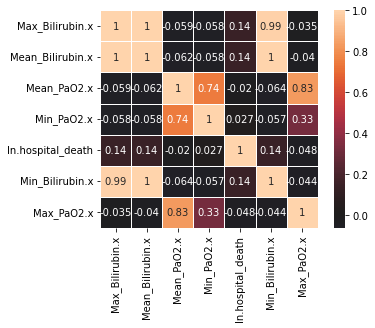

In [40]:
c=ICU[['Max_Bilirubin.x','Mean_Bilirubin.x','Mean_PaO2.x','Min_PaO2.x','In.hospital_death','Min_Bilirubin.x','Max_PaO2.x']]
corr = c.corr()
d=sns.heatmap(corr, annot=True, center=0, square=True, linewidths=.5)
d

In [41]:
#a=sns.boxplot(data=ICU, x="Gender",y="Age")
#a= sns.countplot(data=ICU,y='Gender')
#a

o is female and 1 represent male

In [42]:
print(ICU.columns)

Index(['RecordID', 'Age', 'Gender', 'Height', 'ICUType2', 'ICUType3',
       'ICUType4', 'Mean_Weight.x', 'Mean_GCS.x', 'Mean_HR.x',
       ...
       'Max_ALT.y', 'Max_AST.y', 'Max_Bilirubin.y', 'Max_Lactate.y',
       'Max_Cholesterol.y', 'Max_TroponinI.y', 'Max_TroponinT.y', 'SAPS.I',
       'SOFA', 'In.hospital_death'],
      dtype='object', length=232)


In [43]:
ICUType3=ICU[ICU.ICUType3==1]
ICUType3["In.hospital_death"].sum()
ICUType3
#group=ICU.groupby(["ICUType3"])
#group["In.hospital_death"].count()
ICUType3=ICUType3[['In.hospital_death']]


<AxesSubplot:xlabel='ICUType', ylabel='In.hospital_death'>

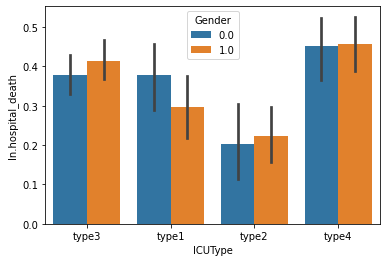

In [44]:
conditions=[(ICU['ICUType2']==1),
           (ICU['ICUType3']==1),
           (ICU['ICUType4']==1)]
choices=["type2","type3","type4"]
ICU['ICUType'] = np.select(condlist= conditions, choicelist= choices, default='type1')
ICU.head()

sns.barplot(data = ICU, x = "ICUType", y = "In.hospital_death", hue = "Gender")
#sns.countplot(data=ICU,x='In.hospital_death',hue='ICUType')

0 means survivors, and 1 means die in hospital

In [45]:
ICU.head()

,RecordID,Age,Gender,Height,ICUType2,ICUType3,ICUType4,Mean_Weight.x,Mean_GCS.x,Mean_HR.x,...,Max_AST.y,Max_Bilirubin.y,Max_Lactate.y,Max_Cholesterol.y,Max_TroponinI.y,Max_TroponinT.y,SAPS.I,SOFA,In.hospital_death,ICUType
0,132543,68,1.0,180.300000,0,1,0,84.600000,14.888889,72.971429,...,15.000000,0.200000,2.395461,156.842105,7.132683,1.114629,7,1,0,type3
1,132545,88,0.0,169.787227,0,1,0,83.054136,15.000000,79.520000,...,260.323666,1.979557,2.395461,156.842105,7.132683,1.114629,17,2,0,type3
2,132547,64,1.0,180.300000,0,0,0,114.000000,8.333333,81.318182,...,162.000000,0.400000,2.395461,212.000000,1.300000,1.114629,14,11,0,type1
3,132551,78,0.0,162.600000,0,1,0,48.400000,13.250000,78.125000,...,82.000000,0.300000,2.300000,156.842105,3.500000,1.114629,19,8,1,type3
4,132554,64,0.0,169.787227,0,1,0,60.700000,15.000000,129.363636,...,260.323666,1.979557,2.395461,156.842105,7.132683,1.114629,11,0,0,type3


In [46]:
ICU['In.hospital_death'].unique()

array([0, 1])

In [47]:
help(np.select)

Help on function select in module numpy:

select(condlist, choicelist, default=0)
    Return an array drawn from elements in choicelist, depending on conditions.
    
    Parameters
    ----------
    condlist : list of bool ndarrays
        The list of conditions which determine from which array in `choicelist`
        the output elements are taken. When multiple conditions are satisfied,
        the first one encountered in `condlist` is used.
    choicelist : list of ndarrays
        The list of arrays from which the output elements are taken. It has
        to be of the same length as `condlist`.
    default : scalar, optional
        The element inserted in `output` when all conditions evaluate to False.
    
    Returns
    -------
    output : ndarray
        The output at position m is the m-th element of the array in
        `choicelist` where the m-th element of the corresponding array in
        `condlist` is True.
    
    See Also
    --------
    where : Return elements f

<AxesSubplot:>

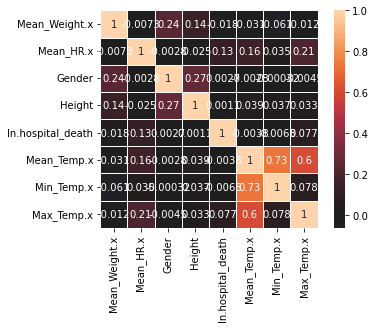

In [48]:
df=ICU[['Mean_Weight.x','Mean_HR.x','Gender','Height','In.hospital_death','Mean_Temp.x','Min_Temp.x','Max_Temp.x']]
corr = df.corr()
a=sns.heatmap(corr, annot=True, center=0, square=True, linewidths=.5)
a

In [49]:
# df1=ICU[['Mean_HR.x']]
# df2=ICU[['Mean_Weight.x']]
X=ICU[["Mean_HR.x"]]
Y=ICU['Mean_Weight.x']
X_train,X_test,Y_train, Y_test=train_test_split(X,Y,test_size= 0.2,random_state=30)
linear = LinearRegression(fit_intercept=True)
linear.fit(X_train,Y_train) 
training_score = linear.score(X_train,Y_train) 
preds_linear = linear.predict(X_test)
rsquared_linear = r2_score(Y_test,preds_linear) 
print("Coefficients are",np.round(linear.coef_, 3))
#print("The training score is", np.round(training_score,3))
#print("Testing score is",np.round(rsquared_linear, 3))
print("Intercept is",np.round(linear.intercept_,3))

Coefficients are [-0.019]
Intercept is 82.262


the data has provided the relationship between the mean heart rate and the mean weight. from the data, it shows that when the mean of the heart rate increase by 1 bpm, the weight should decrease by 0.019.The equation should be Y=82.262-0.019x. when heart rate is 0, the mean weight of people should be 82.262kg.

<AxesSubplot:xlabel='Mean_HR.x', ylabel='Mean_Weight.x'>

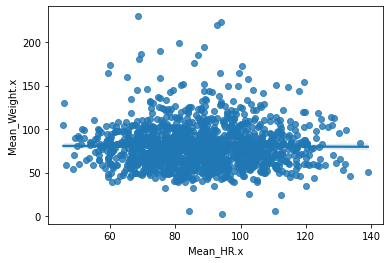

In [50]:
sns.regplot(data = ICU, x = "Mean_HR.x", y = "Mean_Weight.x")

In [51]:
X=ICU[["Gender"]]
Y=ICU['Max_HR.x']
X_train,X_test,Y_train, Y_test=train_test_split(X,Y,test_size= 0.2,random_state=30)
linear = LinearRegression(fit_intercept=True)
linear.fit(X_train,Y_train) 
training_score = linear.score(X_train,Y_train) 
preds_linear = linear.predict(X_test)
rsquared_linear = r2_score(Y_test,preds_linear) 
print("Coefficients are",np.round(linear.coef_, 3))
#print("The training score is", np.round(training_score,3))
#print("Testing score is",np.round(rsquared_linear, 3))
print("Intercept is",np.round(linear.intercept_,3))

Coefficients are [0.672]
Intercept is 106.891


the data provide the relationship between the Gender and the maxmimum heart rate. in the data, it represents that the different max heart rate between female and male should be 0.672 bpm, which means that the max heart rate of male is 0.672 bpm higher than the female. The mean of the max heart rate for female is 106.891 

In [52]:
X=ICU[["Max_Weight.x"]]
Y=ICU['Max_HR.x']
X_train,X_test,Y_train, Y_test=train_test_split(X,Y,test_size= 0.2,random_state=30)
linear = LinearRegression(fit_intercept=True)
linear.fit(X_train,Y_train) 
training_score = linear.score(X_train,Y_train) 
preds_linear = linear.predict(X_test)
rsquared_linear = r2_score(Y_test,preds_linear) 
print("Coefficients are",np.round(linear.coef_, 3))
#print("The training score is", np.round(training_score,3))
#print("Testing score is",np.round(rsquared_linear, 3))
print("Intercept is",np.round(linear.intercept_,3))

Coefficients are [-0.031]
Intercept is 109.793


In [53]:
X=ICU[["Min_Weight.x"]]
Y=ICU['Min_HR.x']
X_train,X_test,Y_train, Y_test=train_test_split(X,Y,test_size= 0.2,random_state=30)
linear = LinearRegression(fit_intercept=True)
linear.fit(X_train,Y_train) 
training_score = linear.score(X_train,Y_train) 
preds_linear = linear.predict(X_test)
rsquared_linear = r2_score(Y_test,preds_linear) 
print("Coefficients are",np.round(linear.coef_, 3))
#print("The training score is", np.round(training_score,3))
#print("Testing score is",np.round(rsquared_linear, 3))
print("Intercept is",np.round(linear.intercept_,3))

Coefficients are [0.014]
Intercept is 70.409


the data provides the relationship between

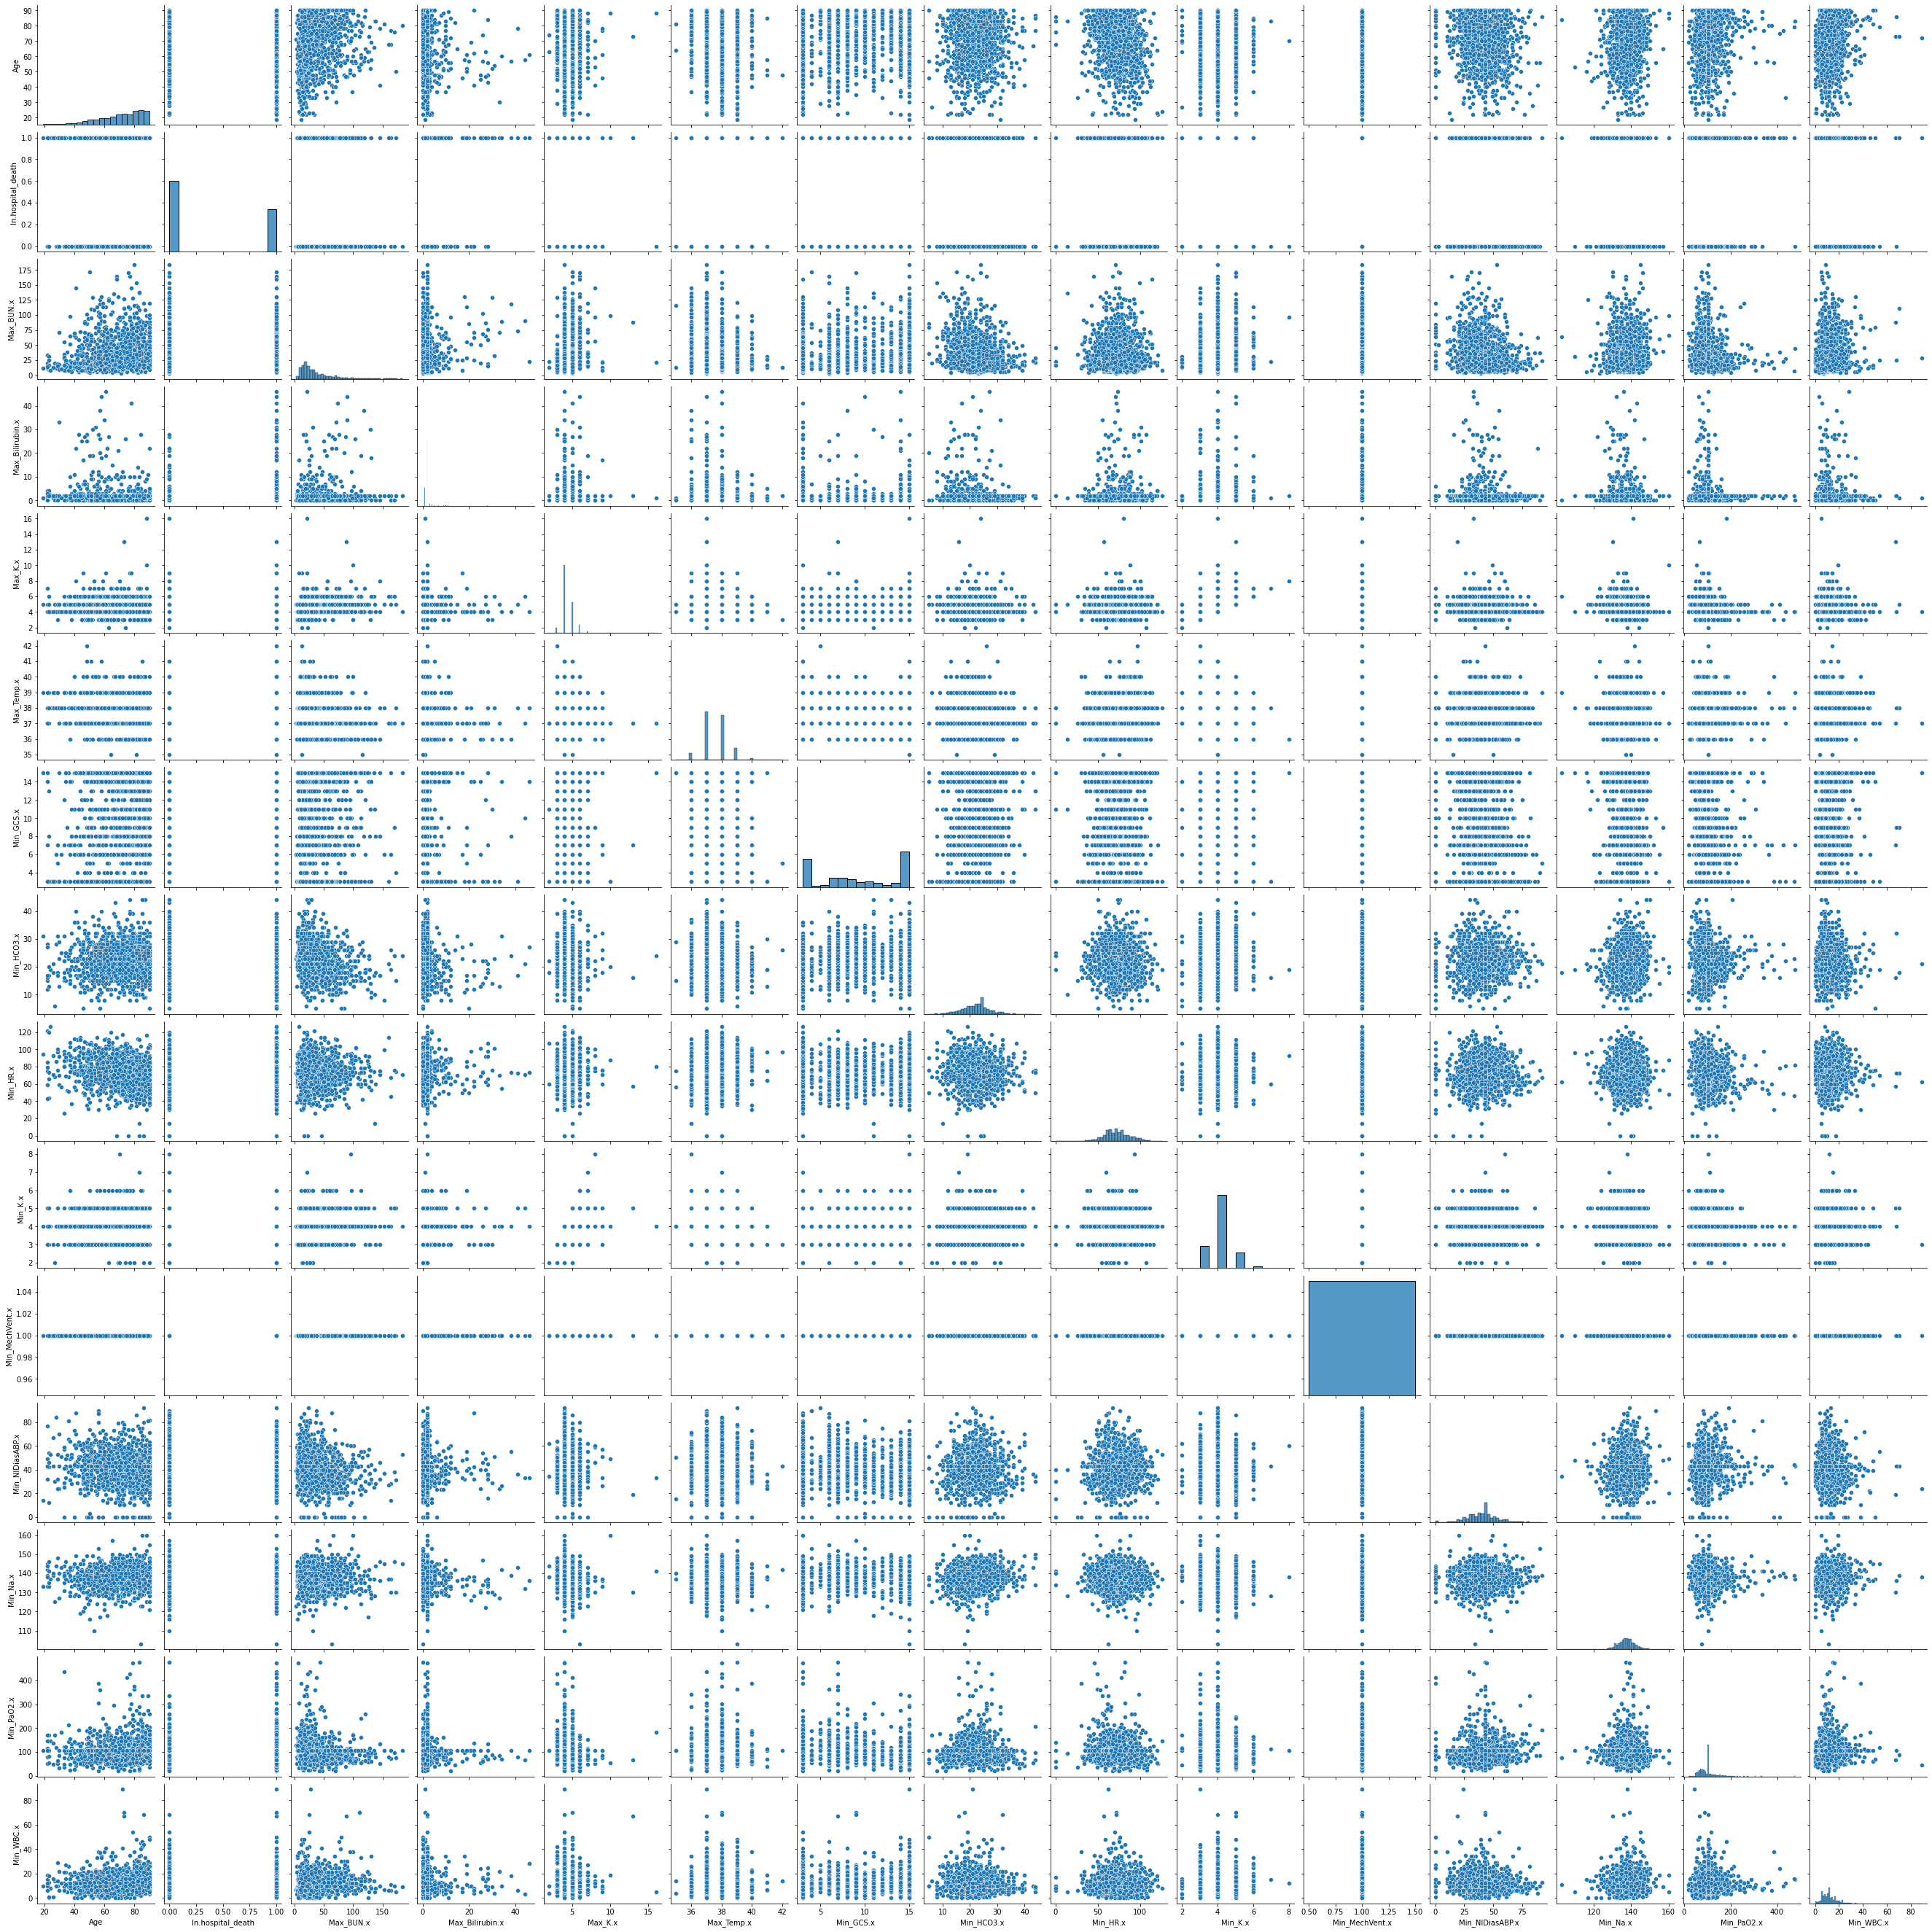

In [54]:
pivot1 = ICU.pivot_table(index='RecordID', values=["In.hospital_death",'Age','Min_HR.x','Min_NIDiasABP.x','Max_Temp.x','Min_GCS.x','Min_MechVent.x','Min_PaO2.x','Max_BUN.x','Min_Na.x','Min_K.x','Max_K.x','Max_Bilirubin.x','Min_WBC.x',"Min_HCO3.x"]).round()
 
sns.pairplot(pivot1)

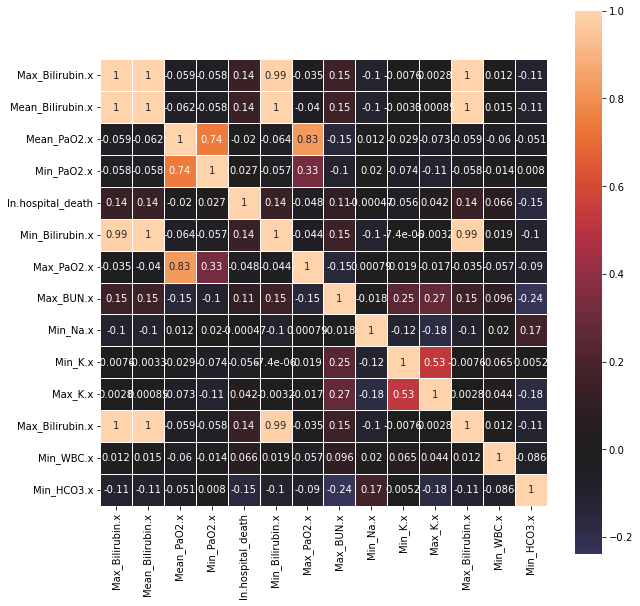

In [55]:
c=ICU[['Max_Bilirubin.x','Mean_Bilirubin.x','Mean_PaO2.x','Min_PaO2.x','In.hospital_death','Min_Bilirubin.x','Max_PaO2.x','Max_BUN.x','Min_Na.x','Min_K.x','Max_K.x','Max_Bilirubin.x','Min_WBC.x',"Min_HCO3.x"]]
corr = c.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
d=sns.heatmap(corr, annot=True, center=0, square=True, linewidths=.5)

Text(0.5, 1.0, 'the correlation between max_BUN and Max_k')

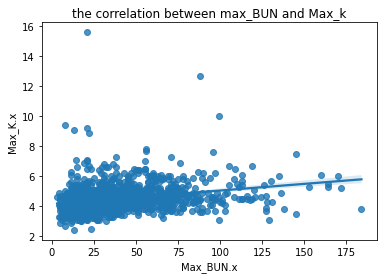

In [56]:
sns.regplot(data = ICU, x = "Max_BUN.x", y = "Max_K.x")
plt.title("the correlation between max_BUN and Max_k")

In [57]:
X=ICU[["Max_BUN.x","Max_K.x"]]
Y=ICU['In.hospital_death']
X_train,X_test,Y_train, Y_test=train_test_split(X,Y,test_size= 0.2,random_state=30)
linear = LinearRegression(fit_intercept=True)
linear.fit(X_train,Y_train) 
training_score = linear.score(X_train,Y_train) 
preds_linear = linear.predict(X_test)
rsquared_linear = r2_score(Y_test,preds_linear) 
print("Coefficients are",np.round(linear.coef_, 3))
#print("The training score is", np.round(training_score,3))
#print("Testing score is",np.round(rsquared_linear, 3))
print("Intercept is",np.round(linear.intercept_,3))

Coefficients are [ 0.002 -0.004]
Intercept is 0.325
